These series of notebook is memos for [Introduction to Numerical Methods](https://ocw.mit.edu/courses/mathematics/18-335j-introduction-to-numerical-methods-spring-2019/index.htm). 

Below are the course description
> This course offers an advanced introduction to numerical analysis, with a focus on accuracy and efficiency of numerical algorithms. Topics include sparse-matrix/iterative and dense-matrix algorithms in numerical linear algebra (for linear systems and eigenproblems), floating-point arithmetic, backwards error analysis, conditioning, and stability. Other computational topics (e.g., numerical integration or nonlinear optimization) are also surveyed.

# Square Roots via Newton Methods

### 1. Overview
*Numerical methods* can be distinguished from other branches of analysis and computer science by 3 characteristics.

* They work with arbitrarily **real** numbers (although in practice we only ever compute rationalapproximationsof irrational results)
* We are concerned not only with existence and correctness of the solutions but with the **time** required to compute the result.
* We are concerned with **accuracy** of the results, because in practice we only have **approximate** answers.
  - *How fast they converge* is a key question.
  - *Arithmetic with real numbers is approximate*
  
### 2. Square Roots

Babylonians method to compute game roots $x = \sqrt{a}$ for $a > 0$ is to solve $x^2 = a$. The algorithm starts with some guess $x_1 > 0$ and computes the sequence of improved guesses.

$$ x_{n+1} = \frac{1}{2}\Big(x_n + \frac{a}{x_n}\Big) $$

In modern times, Newton method to find a root of $f(x) = x^2 - a$ by approximate root of $f(x) = 0$ from a guess $x_n$ by approximating $f(x)$ as its tangent line $ f(x_n) + f'(x_n)(x - x_n)$ leading to an improved guess $x_{n+1}$ from the root of the tangent

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Let's try for $\sqrt{2} = 1.414213562373095\cdots$ starting with a guess of 1.5

In [1]:
x = 1.5
a = 2
x = (x + a/x)/2
print(x)

1.4166666666666665


In [2]:
x = (x + a/x)/2
print(x)

1.4142156862745097


In [3]:
x = (x + a/x)/2
print(x)

1.4142135623746899


After **3 iterations** we have **12 correct digits**

In [4]:
import numpy as np
import mpmath
import matplotlib.pyplot as plt

In [5]:
def iterate_square(a, iteration, guess):
    for i in range(iteration): 
        guess = (guess + a/guess)/2
    return guess

In [6]:
for i in range(11):
    print(iterate_square(mpmath.mpf(2), i, mpmath.mpf(1)))

1.0
1.5
1.41666666666667
1.41421568627451
1.41421356237469
1.41421356237309
1.41421356237309
1.41421356237309
1.41421356237309
1.41421356237309
1.41421356237309


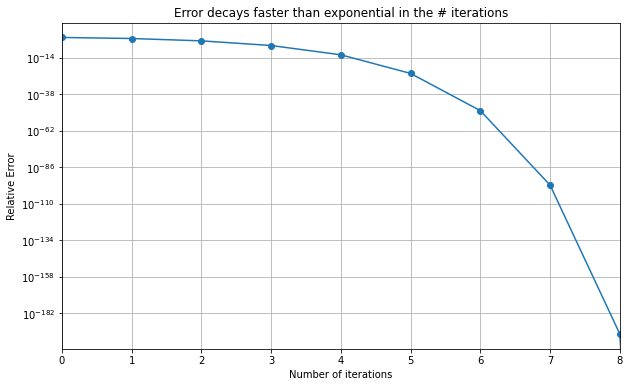

In [7]:
mpmath.mp.dps = 200
abserr = lambda approx, exact: mpmath.fdiv(mpmath.fabs(approx-exact), exact)
vals = [iterate_square(mpmath.mpf(2), i, mpmath.mpf(1)) for i in range(10)]
errs = [abserr(val, mpmath.sqrt(mpmath.mpf(2))) for val in vals]
plt.figure(figsize=(10,6))
plt.semilogy(errs, 'o-')
plt.grid()
plt.xlim([0,8])
plt.xlabel('Number of iterations')
plt.ylabel('Relative Error')
plt.title('Error decays faster than exponential in the # iterations');

**The number of accurate digits approximately doubles on each iteration.** 